## Homework
### Noe: Data for tasks 1 and 2 could be found [here](https://syncandshare.lrz.de/getlink/fiLmDyv8FXqFyN1X3hbhwazH/01-Realsense)

### 1.Stereo Reconstruction and laser-pattern (workload 1 student):
In this exercise, we will have a look over the 
1. Read the color, infrared1, infrared2 images in the folder Homework/HW-1-data (images with numbers (1262, 1755, 1131, 0000))
2. Use OpenCV Stereo Block Matching to find the disparity map, then use the equation for depth to calculate the estimated depth map. You could assume that (focal_length=970 mm, baseline=50 mm) 
3. Use OpenCV to visualize the reconstructed depth image along with the infrared images using `cv2.imshow`.
4. What is the difference between the depth quality with respect to 
     1. planes with texture (Checkerboard) vs. planes without texture (the PC case)
     2. with laser pattern (1262,1755) vs no laser-pattern (0000,1131) 

In [21]:
import numpy
import cv2
from matplotlib import pyplot as plt
import cv2 
import os
from matplotlib import pyplot as plt
import numpy as np
import pyrealsense2 as rs



img_infra1_1262 = cv2.imread('HW1-1-data//infra1_1262.jpg', 0)
img_infra1_1755 = cv2.imread('HW1-1-data//infra1_1755.jpg', 0)
img_infra1_1131 = cv2.imread('HW1-1-data//infra1_1131.jpg', 0)
img_infra1_0000 = cv2.imread('HW1-1-data//infra1_0000.jpg', 0)

img_infra2_1262 = cv2.imread('HW1-1-data//infra2_1262.jpg', 0)
img_infra2_1755 = cv2.imread('HW1-1-data//infra2_1755.jpg', 0)
img_infra2_1131 = cv2.imread('HW1-1-data//infra2_1131.jpg', 0)
img_infra2_0000 = cv2.imread('HW1-1-data//infra2_0000.jpg', 0)

left = img_infra1_1131
right = img_infra2_1131

cv2.imshow('test', img_infra1_1262)
cv2.waitKey(0) 
cv2.destroyAllWindows()

fx = 970        # lense focal length
baseline = 50   # distance in mm between the two cameras
disparities = 96   # num of disparities to consider
block = 35     # block size to match
units = 0.001       # depth units

def GetDepth(img1, img2, focal_length, baseline, num_disparity, block, units):

    sbm = cv2.StereoBM_create(numDisparities=num_disparity,
                              blockSize=block)
    # calculate disparities
    disparity = sbm.compute(img1, img2)
#     plt.imshow(disparity, 'gray')
#     plt.title('Disparity image')
#     plt.show()

    valid_pixels = disparity > 0

    # calculate depth data
    depth = numpy.zeros(shape=left.shape).astype('float')
    depth[valid_pixels] = (fx * baseline) / (units * disparity[valid_pixels])
    # visualize depth data
    # Data normalization 0-255
    depth = cv2.normalize(depth, depth, alpha=255,
                                  beta=0, norm_type=cv2.NORM_MINMAX)

    return depth


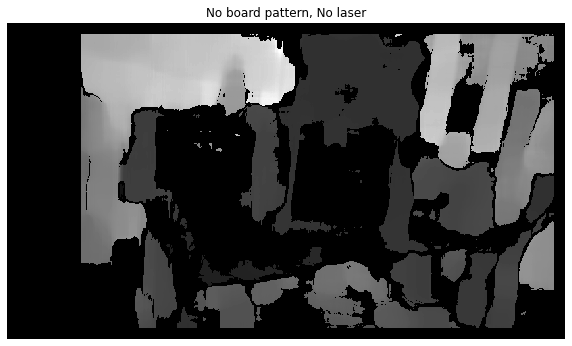

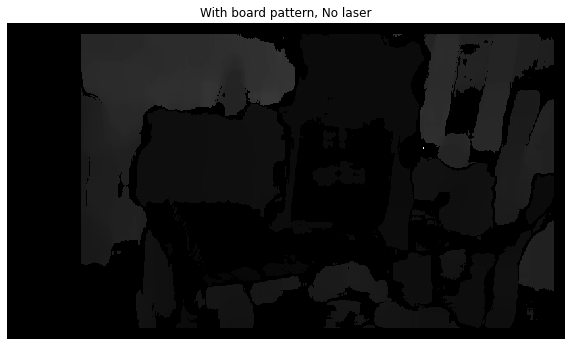

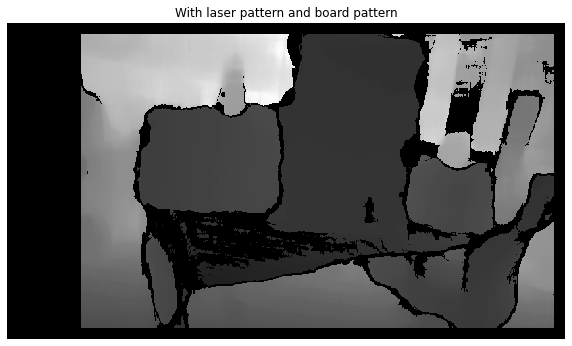

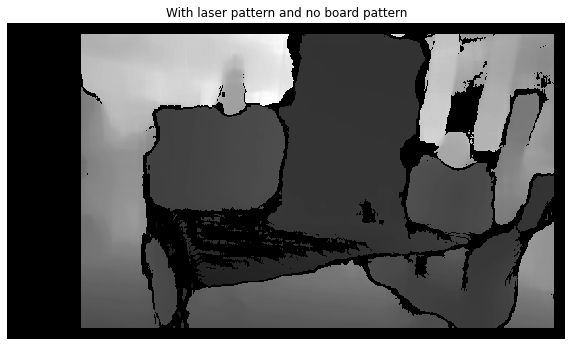

In [27]:
plt.rcParams['figure.figsize'] = (10.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# No board pattern
left = img_infra1_0000
right = img_infra2_0000
depth_img = GetDepth(left, right, fx, baseline, disparities, block, units)
plt.imshow(depth_img, 'gray')
plt.title('No board pattern, No laser')
plt.axis('off')
plt.show()
# cv2.imshow('No Board Pattern', np.array(depth_img, 'uint8'))

# With board pattern
left = img_infra1_1131
right = img_infra2_1131
depth_img = GetDepth(left, right, fx, baseline, disparities, block, units)
plt.imshow(depth_img, 'gray')
plt.title('With board pattern, No laser')
plt.axis('off')
plt.show()
# cv2.imshow('With Board Pattern', np.array(depth_img*4, 'uint8'))

# With laser pattern and board pattern
left = img_infra1_1262
right = img_infra2_1262
depth_img = GetDepth(left, right, fx, baseline, disparities, block, units)
plt.imshow(depth_img, 'gray')
plt.title('With laser pattern and board pattern')
plt.axis('off')
plt.show()

# With laser pattern and no board pattern
left = img_infra1_1755
right = img_infra2_1755
depth_img = GetDepth(left, right, fx, baseline, disparities, block, units)
plt.imshow(depth_img, 'gray')
plt.title('With laser pattern and no board pattern')
plt.axis('off')
plt.show()

# Close all windows
# cv2.waitKey(0) 
# cv2.destroyAllWindows()